In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline

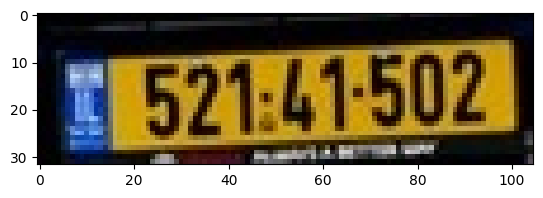

In [173]:
img = cv2.imread("plate.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

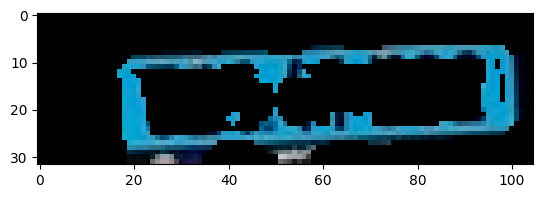

In [174]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
blur_hsv = cv2.GaussianBlur(hsv, (11,11), cv2.BORDER_DEFAULT)
upper = np.array([40, 255, 255])
lower = np.array([20, 0, 0])
mask = cv2.inRange(blur_hsv, lower, upper)
hsv_mask = cv2.bitwise_and(img, img, mask=mask)
# rgb = cv2.cvtColor(img, cv2.COLOR_HSV2GRAY)
plt.imshow(hsv_mask)

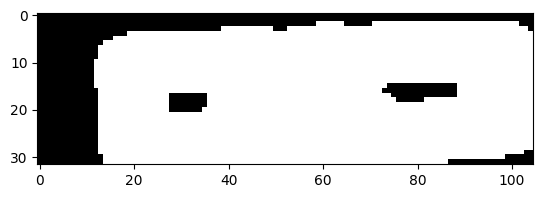

In [175]:
gray = cv2.cvtColor(hsv_mask, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11), cv2.BORDER_DEFAULT)
# contrast_enhanced = cv2.normalize(blur, None, alpha=41, beta=42, norm_type=cv2.NORM_MINMAX)
# _, binary_thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
_, thresh = cv2.threshold(blur, 1, 255, cv2.THRESH_BINARY)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
# thresh_op = cv2.bitwise_not(thresh)
# blur2 = cv2.GaussianBlur(thresh_op, (3, 3), 0)

# kernel = np.ones((2, 2), np.uint8)
# closing = cv2.morphologyEx(blur2, cv2.MORPH_CLOSE, kernel)

plt.imshow(thresh, cmap="gray")

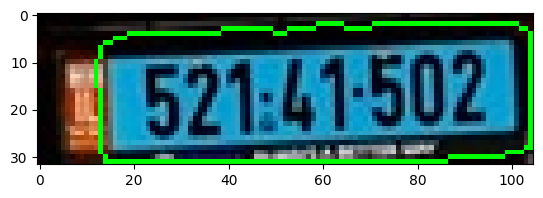

In [176]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)
plt.imshow(contour_img)
img_cop = img.copy()

True

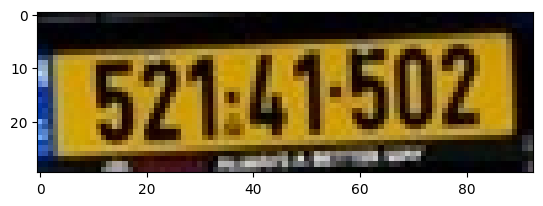

In [177]:
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

roi = img[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
cv2.imwrite("closeup.png", roi)

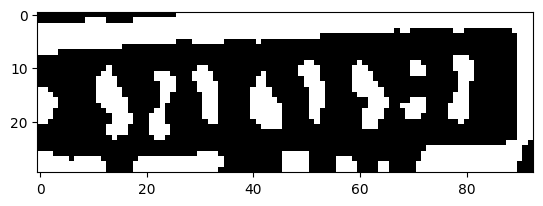

In [178]:
roi_g = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
roi_b = cv2.GaussianBlur(roi_g, (11, 11), 0)
roi_thresh = cv2.adaptiveThreshold(roi_b, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, 8)
plt.imshow(roi_thresh, cmap="gray")

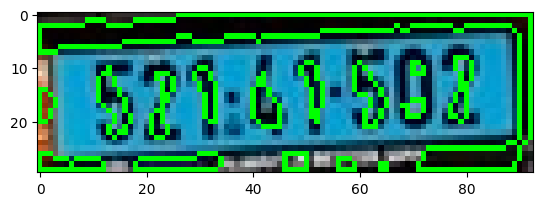

In [179]:
roi_conts, _ = cv2.findContours(roi_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
roi_cop = roi.copy()
cv2.drawContours(roi_cop, roi_conts, -1, (0, 255, 0), 1)
plt.imshow(roi_cop)

46.34375

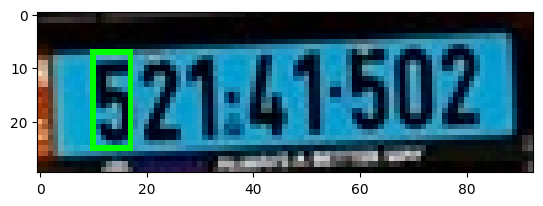

In [180]:
boxes = []
roi_cop = roi.copy()
increase_factor_w = 0.13
increase_factor_h = 0.3


average_area = sum(cv2.contourArea(cnt) for cnt in roi_conts) / len(roi_conts)
roi_conts = sorted(roi_conts, key=lambda cnt: cv2.boundingRect(cnt)[0])

for cnt in roi_conts:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h
    if aspect_ratio < 0.8 and aspect_ratio > 0.2:
        cont_area = cv2.contourArea(cnt)
        if cont_area < average_area * 0.8:
            continue
        
        increase_width = w * increase_factor_w
        increase_height = h * increase_factor_h

        # Adjust x, y, w, h
        x = int(max(x - increase_width / 2, 0))  # Ensuring new_x doesn't go below 0
        y = int(max(y - increase_height / 2, 0))  # Ensuring new_y doesn't go below 0
        w = int(w + increase_width)
        h = int(h + increase_height)
        cont_area = cv2.contourArea(cnt)
        boxes.append((x, y, w, h))
        cv2.rectangle(roi_cop, (x, y), (x + w, y + h), (0, 255, 0), 1)
plt.imshow(roi_cop)
average_area

In [168]:
for i, (x, y, w, h) in enumerate(boxes):
    cv2.imwrite(f"Digits/Digit{i}.png", roi[y:y+h, x:x+w])